# DSCI 100 FINAL PROJECT

## 1. Introduction

Video games. Of course, we all know what it is. It is how many people spend their free time, and connect with other fellow gamers. With the invention of video games brings a benefit for researchers and observers. They can study with detailed digital records called game telemetry. Game telemetry records the data of the players themselves and what they do in the game, such as the duration of each play session and how they communicate with one another. This data is very useful for research because it shows real-life behavior in a virtual setting instead of relying only on surveys or controlled lab studies.

In this project, we analyze data from a research Minecraft server run by a computer science group at the University of British Columbia, led by Professor Frank Wood. The server previously mentioned is specifically made for research on the ways people play games. Every time a player logs in, the server records information and data about their activity. This includes the times they start and end, and the total amount of time played on the game. The research team uses these records to understand how different players interact with certain aspects of the game and how long they stay active.

Running a server like this takes planning and resources. The research group needs to recruit enough players to collect useful data, and they also need to make sure the server can support the total number of players. Because of that, they use a game-related newsletter to stay connected with players, and it is something players can choose to subscribe to if they want to know more about the game. Understanding which players are more likely to subscribe can help the research group focus its recruitment efforts and manage server capacity more effectively.

This leads to the broad question of the project: **What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between different types of players?**  The goal is to build a model that predicts whether a player will subscribe based on their activity on the server and thus, we will be exploring the specific question: **To what extent can player's age and engagement level, measured by the total hours played, be used to predict whether a player subscribes to the game newsletter, and how do these characteristics differ between subscribers and non-subscribers?**

To answer this question, the players.csv dataset will be used to give a complete picture of player behaviour. The players.csv file has one row for each player on the Minecraft research server and includes a number of variables that describe their background and overall activity. It records each player’s experience level, which can be Beginner, Regular, Amateur, Veteran, or Pro. It also includes the subscribe variable, which shows whether the player decided to subscribe to the game-related newsletter, and this is the main target variable for the project. Each player also has a hashedemail value, which is a unique privacy-protected version of their email. The file includes played_hours as well, which shows how many total hours each player spent on the server.  Additional demographic information, such as name, gender, and Age is included as well, which may help explore whether different groups show different subscription patterns. 

Overall, this dataset provides the key player-level information needed to analyze behaviour and predict newsletter subscription. These summary features give us a broad idea of how engaged each player is. This project will focus on the variables **Age, played hours, and subscription status**, where age and played hours are the two main predictors, and the subscribe variable is the predicted outcome.

Using these recorded data, we will explore how age, and playtime differ between subscribers and non-subscribers, and then fit a k-nearest neighbour (KNN) classification model to predict newsletter subscription. The goal is to help the research group better understand their players and make more informed decisions about recruitment and resource planning.


## 2. Methods & Results

### a. Loading the Data ### 

In [14]:
library(tidyverse)

players <- read_csv("/home/jovyan/work/ubcdsci100finalproject/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


To begin, I will be loading tidyverse as it allows for the use of certain functions such as ggplot, and read_csv. 
The players.csv dataset was loaded using read_csv(). This file contains 196 observations and 7 variables, including a hashed player ID, gender, age, total hours played, and whether the player subscribed to the newsletter. This step imports the raw data into R, so analysis could be made with the dataset.

### b. Data Wrangling ### 

In [15]:
player_data <- players |>
    select(Age, played_hours, subscribe) |>
    filter(!is.na(Age)) |>
    mutate(subscribe = as_factor(subscribe)) 

player_data

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE
19,0.0,TRUE
21,0.0,FALSE
47,0.1,TRUE


Next, a new dataset was created consisting the variables Age, played_hours, and subscribe, which will be used to model and deliver the predictive analysis. 
The select function was used to include the variables of interest, the filter function, with !is.na was used to drop any missing values (NA) and the mutate function as_factor was used to convert subscribe into a factor so that models treat it as a categorical outcome rather than a logical TRUE/FALSE variable.
Two rows were removed due to missing age values, leaving 194 observations. 
This preprocessing ensures that the dataset is clean and ready for both exploratory analysis and modelling.

### c. Summary Statistics (Exploratory Data Analysis) ###

In [16]:
average_hr_played <- player_data |> 
    summarize(average_hr_played = round(mean(played_hours, na.rm = TRUE), 2))

average_age <- player_data |>
    summarize(average_age = round(mean(Age, na.rm = TRUE), 2))

average_age
average_hr_played

average_age
<dbl>
21.14


average_hr_played
<dbl>
5.9


Basic descriptive statistics were calculated to understand player's general characteristics. 
Player's Average hours played was calculated using the function summarize, which gave approximately 5.9 hours, showing that most players have relatively low in-game engagement.
Player's Average age was also calculated using summarize, with approximately 21.14 years, indicating that the dataset mainly consists of younger players.
These values are really helpful in contextualizing the visualization patterns, providing more insight to the students demographic. 

### d. Visualization of Player Characteristics ###

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

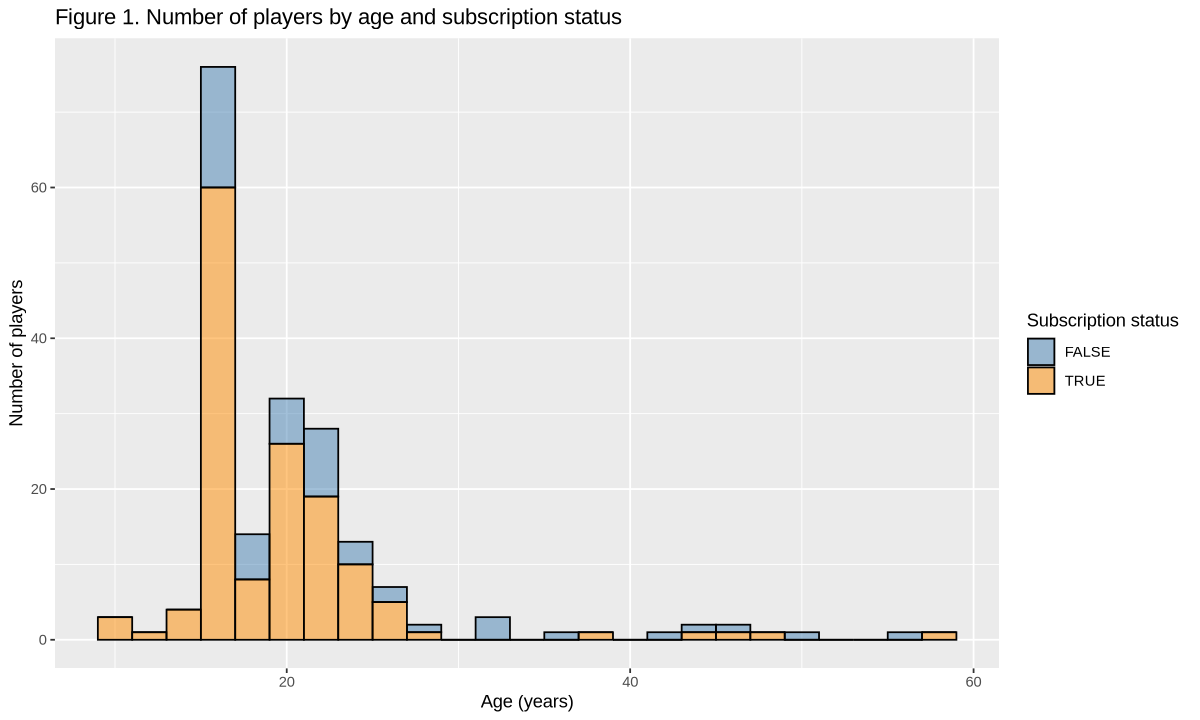

In [17]:
options(repr.plot.height = 6, repr.plot.width = 10)
age_hist <- player_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(alpha = 0.5, binwidth = 2, position = "stack", color = "black") +
    labs(x = "Age (years)", y = "Number of players",
         fill = "Subscription status") +
    ggtitle("Figure 1. Number of players by age and subscription status") +
    scale_fill_manual(values = c("steelblue","darkorange"))
    theme(text = element_text(size = 12))

age_hist

Figure 1. Number of players by age and subscription status is a histogram graph, showing player's Age in the x column and the total number of players in the y column. This was created with ggplot using geom_histogram(), with the bars colored by subscription status.
A histogram was chosen as it allows for visual comparison of the age groups that had the most players. Moreover, stacked bars were used to clearly identify and compare the number of subscribers and non-subscribers within each range group. 
Results from the graph showed that most players fall between ages 17 and 23, however the overlapping distributions illustrate that age alone may not be a strong predictor of subscription.

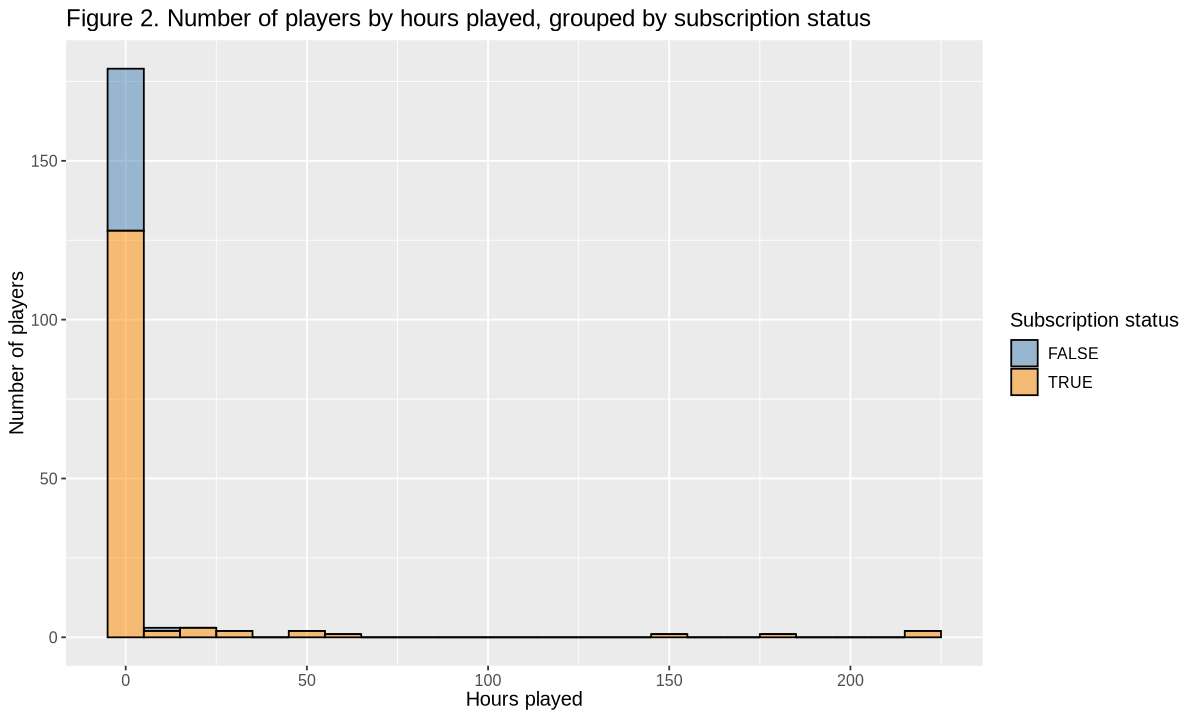

In [18]:
options(repr.plot.height = 6, repr.plot.width = 10)

hours_hist <- player_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10, position = "stack", color = "black", alpha = 0.5) +
    labs(x = "Hours played", y = "Number of players", fill = "Subscription status") +
    ggtitle("Figure 2. Number of players by hours played, grouped by subscription status") +
    scale_fill_manual(values = c("steelblue", "darkorange")) +
    theme(text = element_text(size = 12))


hours_hist

Figure 2. Number of players by hours played, grouped by subscription status is also a histogram used by similar methods, but instead showing the number of players across different ranges of played_hours, again separated by subscription category. Most players played fewer than 10 hours, but the histogram shows that subscribers tend to play slightly more hours on average higher playtime intervals contain proportionally more subscribers. This suggests that hours played may be more informative than age for predicting subscription behavior.

### e. Train/Test Split ###

In [19]:
library(tidymodels)
set.seed(1)
players_split <- initial_split(player_data, prop = 0.75, strata = subscribe) 

player_train <- training(players_split)
player_test <- testing(players_split)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



To evaluate model performance accurately, the player_data dataset was split into 75% training data, and 25% testing data. The split was done using the initial_split() function in the tidymodels packaged, set with strata = subscribe, ensuring that the training and test sets maintain the same proportion of subscribers and non-subscribers. Moreover, this stratified split prevents bias that might arise if one subscription group were under-represented in either dataset. Data has been split into two groups as the training set is used for model fitting and tuning, while the test set provides an unbiased final evaluation of predictive performance.

### f. Preprocessing Recipe for Modeling ###

In [20]:
player_recipe <- recipe(subscribe ~ Age + played_hours, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

A recipe was created using the recipe function that basically tells us that a predictive analysis on subscription status will be made, and the age and played_hous will be the perdictors.
Two preprocessing steps were included, step_scale and step_center to rescales all numeric predictors by subtracting their means  so that they have a mean of 0 and standard deviation of 1.
This step is crucial for KNN because K-Nearest_Neighbor classification is a distance-based algorithm, where variables measured on different scales (e.g., hours vs. years) would otherwise contribute unequally to distance calculations and lead to bias results.

### g. Initial KNN Model (k = 3) ###

In [25]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

player_predict <- predict(knn_fit, player_test) |>
  bind_cols(player_test)

player_accuracy <- player_predict |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

player_accuracy

[1] 0.5918367

An initial KNN classifier was specified using k = 3 neighbors, as well as constructing a workflow that combines the preprocessing recipe with the model specification, creating a baseline model that will evaluate how well the algorithm performs with the data and specifications provided. After fitting this workflow to the training data, the model will become fully trained and capable of generating predictions on the test set, which is key in answering our proposed question.

Predictions were generated on the test dataset using the predict() function, to verify how accurate the predicted subscription outcomes were compared to the original test data. This is done by using the bind_cols() function. After this step was done, by using the metrics() function we can test the accuracy of the baseline KNN model that was just created. 

An accuracy of 0.59 was shown, which means that there was only moderate predictive ability.

### h. Tuning K Using Cross-Validation ###

In [26]:
set.seed(1)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_vfold <- vfold_cv(player_train, v = 10, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

knn_results <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec_tune) |>
    tune_grid(resamples = player_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4413187,10,0.022757432,Preprocessor1_Model01
2,accuracy,binary,0.4479853,10,0.024492810,Preprocessor1_Model02
3,accuracy,binary,0.5366300,10,0.029097973,Preprocessor1_Model03
4,accuracy,binary,0.5166300,10,0.035515406,Preprocessor1_Model04
5,accuracy,binary,0.5052747,10,0.037252473,Preprocessor1_Model05
6,accuracy,binary,0.4914652,10,0.033155660,Preprocessor1_Model06
7,accuracy,binary,0.5805128,10,0.027000630,Preprocessor1_Model07
8,accuracy,binary,0.5584615,10,0.031678109,Preprocessor1_Model08
9,accuracy,binary,0.5809890,10,0.031684944,Preprocessor1_Model09


Now that we know how accurate our previous model was, we can create a new KNN model but this time setting the number of neighbors to tune(), which will tune the data. Moreover, this time a 10-fold cross-validation object was then constructed on the training data, stratified by subscribe, to ensure that each fold will providea a reliable estimate of the sample performance. Next, we would be identifying the accuracy estimate of 25 k values by 1 count at a time. The resulting performance measures were gathered into a single tibble with collect_metrics(), and then filtered to keep only the rows corresponding to the accuracy metric. This accuracies table summarizes how cross-validated accuracy will change when the k value increases, which is key in performing our predictive model as it serves as the basis for selecting the optimal k.

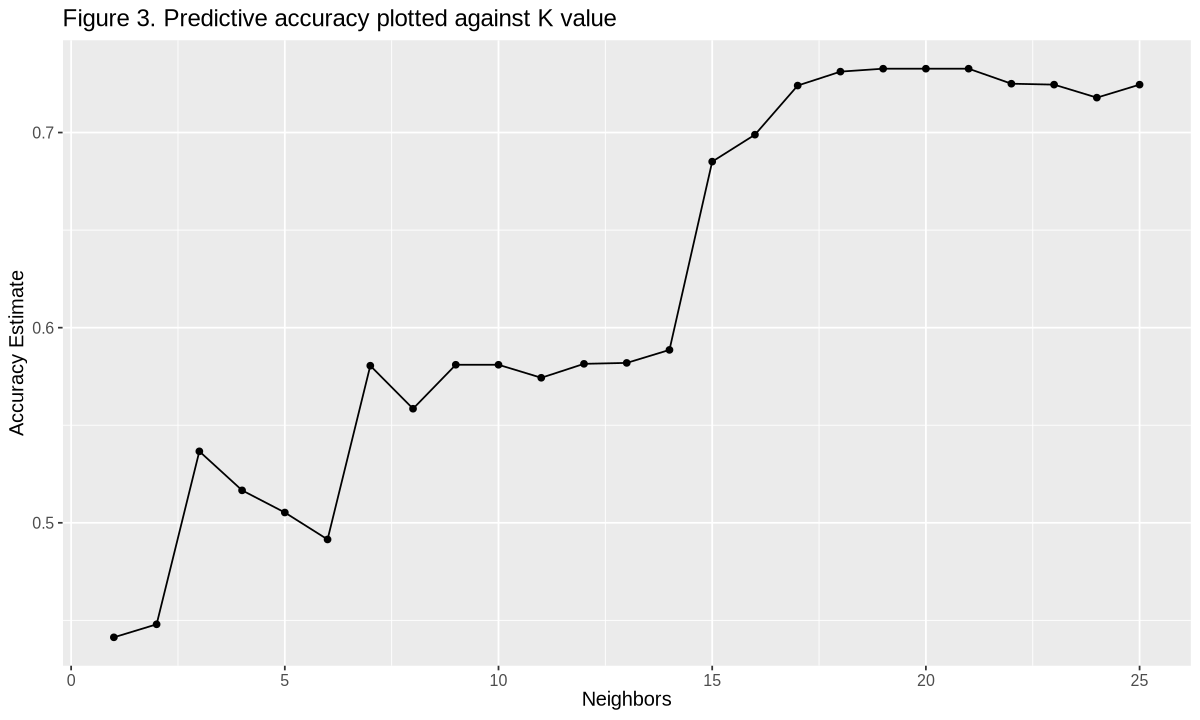

In [27]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 3. Predictive accuracy plotted against K value") +
    theme(text = element_text(size = 12))

accuracy_vs_k

A line plot, Figure 3 was created to analyze the best k value through a visual lense. This graph shows that when the k value is really small, the accuracy fluctuates substantially, which is expected due to low values of k potential cause the model to overfit, which means that the predictions would rely heavily on a single or very small number of training observations, thus making the classifier highly sensitive to noise or outliers in the dataset. However, as the k value increases, a sharp increase in accuracy is portrayed at k = 15, where the accuracy is shown to be the highest around k values of 18 to 21. With this information, it suggests that the model mostly benefits from averaging information across a relatively large neighborhood, as this could reduce the variance without introducing too much bias.

In [29]:
set.seed(1)

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 19

However, as displayed above, the k values with the highest accuracies lies between 18-21, but it is hard to determine which k value specifically has the highest accuracy just through observing the graph. Since the curve flattens in thie regionThus, this is why computing the numerical cross-validated accuracies is important. Rather than relying on visual judgment, the code explicitly sorts the accuracies in descending order and identifies the single value of k that produces the highest mean accuracy across all folds. Based on this calculation, the k value with the highest mean accuracy is k = 19, and thus k = 19 will be selected as the optimal value for the final KNN model. A seed has been set as many steps in the modelling process is based on random sampling. Thus by setting a seed, we fix the random number generator so that every run of the analysis produces the same data results ensuring consistency and reproducibility.

### i. Final KNN Model Selection and Training ###

In [36]:
knn_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_final_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_final_spec) |>
    fit(data = player_train)

This step is similar to be previous workflow setup except, this model specification was created with neighbors = best_k, which is the value that we concluded from with the best accuracy after cross-validation. Now, this workflow can be fitted, and can be used to evaluate the test data. 

### j. Final Model Evaluation on Test Data ###

In [43]:
player_test_predictions <- predict(knn_final_fit, player_test) |>
    bind_cols(player_test)

player_test_metrics <- player_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)

player_precision_predictions <- player_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second") 

player_recall_predictions <- player_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

player_test_metrics
player_precision_predictions
player_recall_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.67346939
kap,binary,-0.04255319


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7272727


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8888889


After the optimal K value was fitted on the KNN model, predictions from the test set can be used to evaluate this model. The final model achieved an accuracy of approximately 0.673 which means that it correctly classified about two-thirds of players. To better understand how the model performs specifically on the subscriber class, two predictive metrics were performed: One was the precision prediction, and the other was the recall prediction. Both used "second" as the event level as that corresponded to the TRUE = subscriber category. The precision value was 0.727 which indicates that when the model predicts a player will subscribe, it is correct about 73% of the time, while the recall of 0.889 shows that the model successfully identifies nearly 89% of actual subscribers. Together, these metrics provide a detailed picture of the final model’s predictive ability and reveal that it is particularly strong at detecting true subscribers.

In [39]:
player_confusion <- player_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

player_confusion

          Truth
Prediction FALSE TRUE
     FALSE     1    4
     TRUE     12   32

A confusion matrix was generated to provide a more detailed breakdown of the model’s classification performance across the two subscription categories. The matrix shows that the model correctly identified 32 subscribers (True Positives) but incorrectly predicted 4 subscribers as non-subscribers (False Negatives). For the non-subscriber class, the model correctly classified 1 player as a non-subscriber (True Negative) but incorrectly labeled 12 non-subscribers as subscribers (False Positives). This pattern reflects the precision and recall values that we calculated above, and it shows exactly where misclassifications occurs in our model. 

### k. Visualization of Model Predictions ###

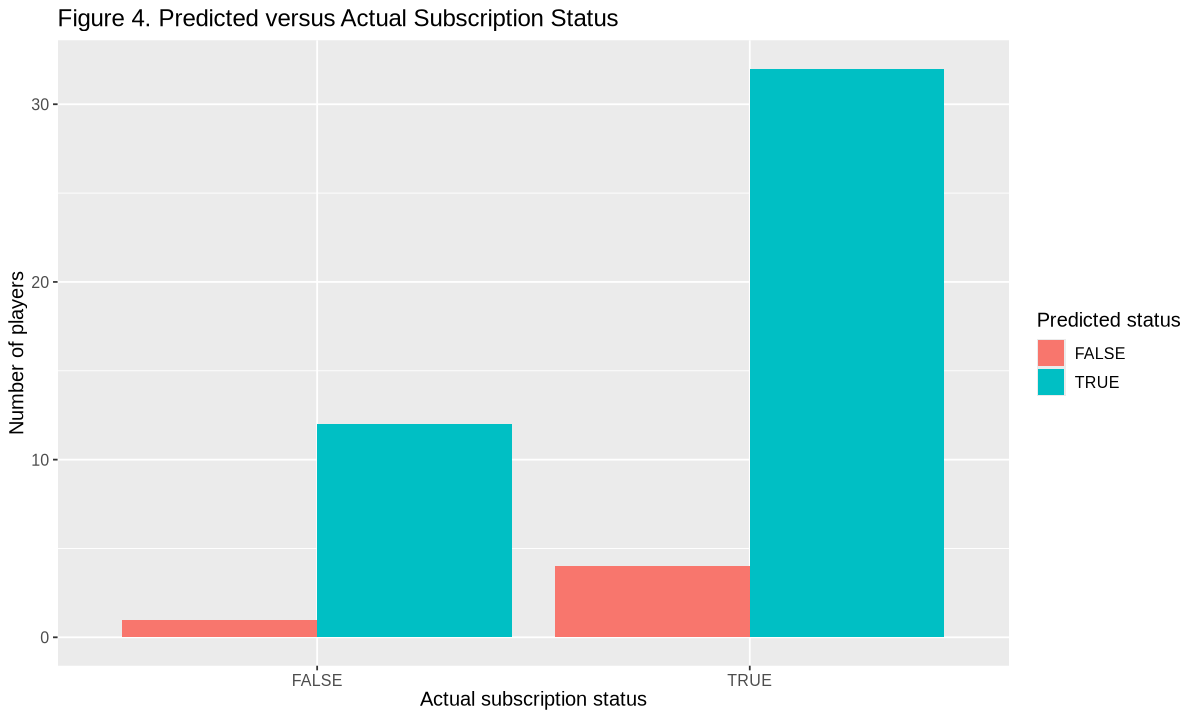

In [44]:
pred_vs_actual <- ggplot(player_test_predictions,
                         aes(x = subscribe, fill = .pred_class)) +
    geom_bar(position = "dodge") +
    labs(x = "Actual subscription status", y = "Number of players", fill = "Predicted status") +
    ggtitle("Figure 4. Predicted versus Actual Subscription Status") +
    theme(text = element_text(size = 12))

pred_vs_actual


To visualize how well the final KNN model classifies individual players, a bar plot was created that compared between the actual versus predicted subscription status. This visualization helps illustrate how well the final KNN model distinguishes between subscribers and non-subscribers by directly comparing predicted and actual outcomes. Bars were placed side by side for better comparison, and it made it easier to observe which groups the model predicts accurately and where misclassifications occurs. 

## 3. Discussion

This project’s goal was to determine what combination of age and total hours played are the most predictive of a player subscribing to a Minecraft-related newsletter based on a server run by UBC faculty. In order to be able to answer our research question, we decided to build and use a k-Nearest Neighbors (KNN) classification model based on these two predictors. We chose to use these two predictors because they are both quantitative variables which allowed us to create an accurate prediction model, with our binary outcome being subscription status (True/False).

In preliminary data analysis, we noted that the majority of players - and thus the majority of subscribers were a fairly young demographic. Specifically, most players fell in the range of 17-22 years old, with an average age of 21.14 years. Figure 1, a stacked histogram, confirmed the high concentration of players within this range. Average playtime was much more difficult to ascertain data for, due to a large portion of players having little to no playtime. This masked the behavior of highly active players, causing our mean to be 5.9 hours, despite many players logging larger playtimes.

Initially, we ran an untuned KNN model using k=3 neighbors, and were able to achieve an accuracy of 59.18%. This accuracy was too low for satisfaction, and suggested significant room for improvement. Thus, we performed a 10-fold cross-validation and tested k values from 1-25 to identify the optimal number of neighbors as k=19.
Our final model, incorporating k=19, showed significant improvement and was able to achieve a final test set accuracy of 67.35%. This indicates a moderate level of predictive capability based on our model, however it also demonstrated a large imbalance in its predictions. It had somewhat high recall at 88.89%, however had worse precision with only 72.73%.

The high recall in our model suggests that it is good at identifying players who subscribed to the newsletter. However, the significantly lower precision score shows a tendency to over-predict subscription status. Our model only missed 4 true subscribers out of 36, yet it classified 12 non-subscribers as subscribers. This suggests that age and hours played are significant indicators, however they are generally correlated with the population who happen to subscribe.


Expectations: 

These findings aligned somewhat with our initial expectations. We anticipated that hours played would be a very strong predictor, as players who engage significant amounts are generally more invested. While we found some correlation, this variable alone cannot correctly predict status. The high rate of false positives suggests that many players share both high played hours and age bracket of subscribers, but still chose not to subscribe.

Our most surprising finding was the relatively weak overall accuracy and low kappa statistic (-0.04). This value, if near zero, indicates that the model's performance is equivalent to what would be expected by chance given the class imbalance. This low value in our findings emphasizes that our model has high recall,yet cannot be generalized across classes. The predictive power of Age and Hours played are insufficient data for a truly good classification model. Likely, subscription status depends more heavily on qualitative variables that weren’t included in the data set, such as social engagement, personal interest in game mechanics, or external communication such as social channels with other players.


Impacts:

The goal of the classification was to help the research group manage recruitment and understand server capacity. Our findings offer some insights that can be built upon.

The correlation between age and subscription status confirms that the age range 17-22 is most likely to engage with the newsletter, and thus marketing should be directed toward them.

Our model was built to better understand subscription status, therefore it cannot be accurately used to predict server capacities, however we can provide some insight. Many subscribers had hours played, and therefore contributed to server capacity. However, if using this data for server capabilities, it is important to understand that due to our low precision, our data overestimates the amount of players.

Our large error in precision can help us identify players who are likely active and demographically typical, but who are not subscribed to the newsletter. These players, such as the 12 false positives identified, could potentially be targets for marketing in the future. 

The key impact from our findings is understanding and providing information to shift a marketing strategy from simply predicting who will subscribe to understanding the gap between player behavior and informational subscription. The current model allows us to identify likely to subscribe players, rather than act as a true prediction system.


Future Questions

The current model is limited due to its dependence on only two variables, and this allows several options for future research questions.

We could, with more quantitative data, create a better model that would be able to more accurately predict subscription status. Some examples of helpful additional metrics could include: 
Activity on the server: What each player does while playing.
Social metrics: what social platforms are players communicating on, and what is being discussed on said platforms.

We could additionally consider using different models for prediction than KNN to provide different information. A linear regression model could be a future research topic that would explore the direct linear relationship between these variables, rather than simply classifying points based on neighbors. 


## 4. References